In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean


import matplotlib.ticker as ticker
scale_factor = 1e6

pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('science')
%matplotlib inline

In [70]:
df = pd.read_csv("data/results_rq1.csv")

In [71]:
df1 = df

In [72]:
full_names = [
    'Number of Bloated Dependencies', 'Number of Bloated Files in Dependencies', 'Number of Bloated Methods in Dependencies', 
    'Number of Bloated Dependencies in LOC', 'Number of Bloated Files in Dependencies in LOC', 'Number of Bloated Methods in Dependencies in LOC',
    'Percentage of Bloated Dependencies', 'Percentage of Bloated Files in Dependencies', 'Percentage of Bloated Methods in Dependencies',
    'Percentage of Bloated Dependencies in LOC', 'Percentage of Bloated Files in Dependencies in LOC', 'Percentage of Bloated Methods in Dependencies in LOC'
]

In [73]:
description_df = df.describe().round()

name_dict = {column: [full_names[i]] for i, column in enumerate(description_df.columns)}
description_with_names = pd.DataFrame(name_dict)


final_description = pd.concat([description_with_names, description_df])

latex_table = description_df.to_latex(index=True)
with open("tables/rq1_descriptives.tex", "w") as file:
    file.write(latex_table)
latex_table

/var/folders/gq/s5tpqtkx0zn5szv_6cjc3pdw0000gn/T/ipykernel_84990/3490403544.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = description_df.to_latex(index=True)


'\\begin{tabular}{lrrrrrrrrrrrr}\n\\toprule\n{} &     NBD &    NBFD &      NBMD &    NBD-LOC &   NBFD-LOC &   NBMD-LOC &     PBD &    PBFD &    PBMD &  PBD-LOC &  PBFD-LOC &  PBMD-LOC \\\\\n\\midrule\ncount & 1302.00 & 1302.00 &   1302.00 &    1302.00 &    1302.00 &    1302.00 & 1302.00 & 1302.00 & 1302.00 &  1302.00 &   1302.00 &   1302.00 \\\\\nmean  &   10.00 &  694.00 &  10652.00 &   94554.00 &  245988.00 &  185469.00 &   48.00 &   87.00 &   96.00 &    32.00 &     78.00 &     94.00 \\\\\nstd   &   14.00 &  886.00 &  13129.00 &  170566.00 &  332415.00 &  246344.00 &   28.00 &   15.00 &    6.00 &    31.00 &     19.00 &      8.00 \\\\\nmin   &    0.00 &    0.00 &      0.00 &       0.00 &       0.00 &       0.00 &    0.00 &    0.00 &    0.00 &     0.00 &      0.00 &      0.00 \\\\\n25\\%   &    1.00 &   96.00 &   1552.00 &    4727.00 &   32798.00 &   25224.00 &   32.00 &   85.00 &   95.00 &     5.00 &     72.00 &     92.00 \\\\\n50\\%   &    5.00 &  342.00 &   5680.00 &   23190.00 &  1

In [74]:
# correlation_matrix = df.iloc[:, 1:].corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  fmt='.2f',  xticklabels=1, yticklabels=1)
# plt.xticks(rotation=45)

# plt.savefig('docs/images/correlation_heatmap_rq1.pdf', bbox_inches='tight', dpi=300)


In [75]:
metrics = [
    'NBD', 'NBFD', 'NBMD', 'NBD-LOC', 'NBFD-LOC', 'NBMD-LOC',
    'PBD', 'PBFD', 'PBMD', 'PBD-LOC', 'PBFD-LOC', 'PBMD-LOC'
]


/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single

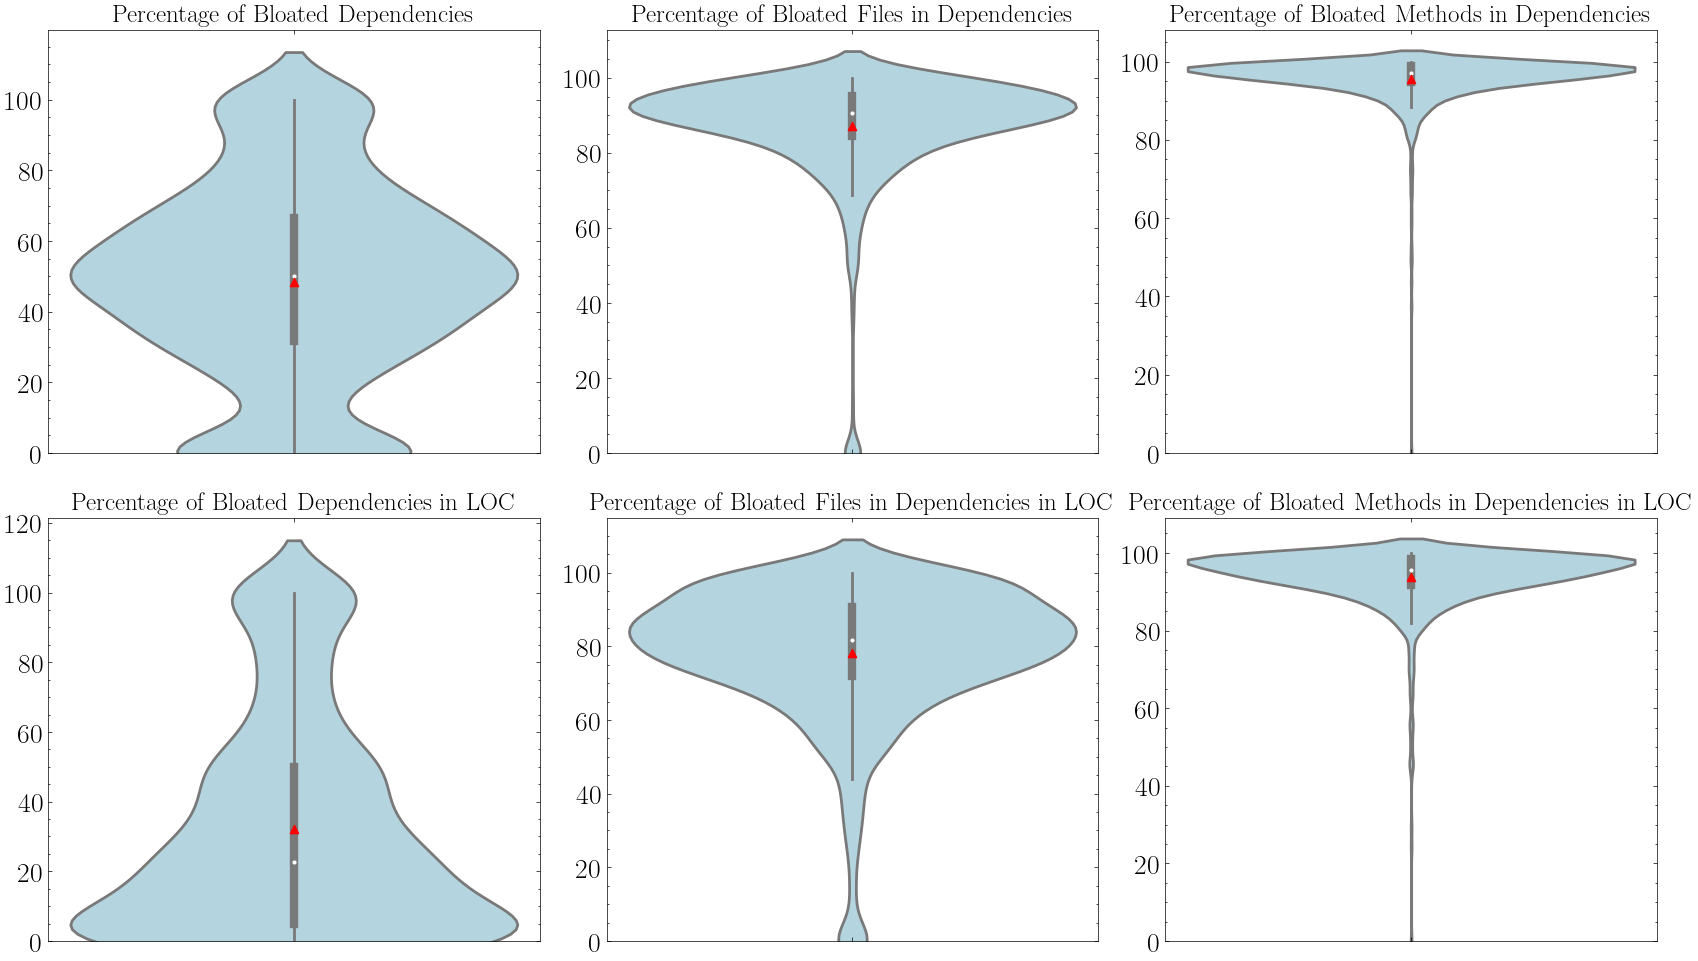

In [76]:

# Second figure with the remaining plots
plt.figure(figsize=(17, 10))
for i, (metric, full_name) in enumerate(zip(metrics[6:], full_names[6:]), 1):
    plt.subplot(2, 3, i)
    ax = sns.violinplot(y=df[metric], linewidth=2, color='lightblue', orient='h')
    ax.set_ylim(0)
    avg_val = df[metric].mean()
    marker = plt.matplotlib.markers.MarkerStyle(marker="^")
    plt.scatter(0, avg_val, color='red', marker=marker, s=35, zorder=5)
    plt.title(f'{full_name}', fontsize=18)
    if df[metric].max() >= 1e6:
        plt.yticks(ticks=plt.yticks()[0], labels=[f'{y/scale_factor:.1f}M' for y in plt.yticks()[0]])
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("")
    plt.tight_layout()
plt.savefig('figures/rq1.pdf')


/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/Users/gdrosos/miniforge3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single

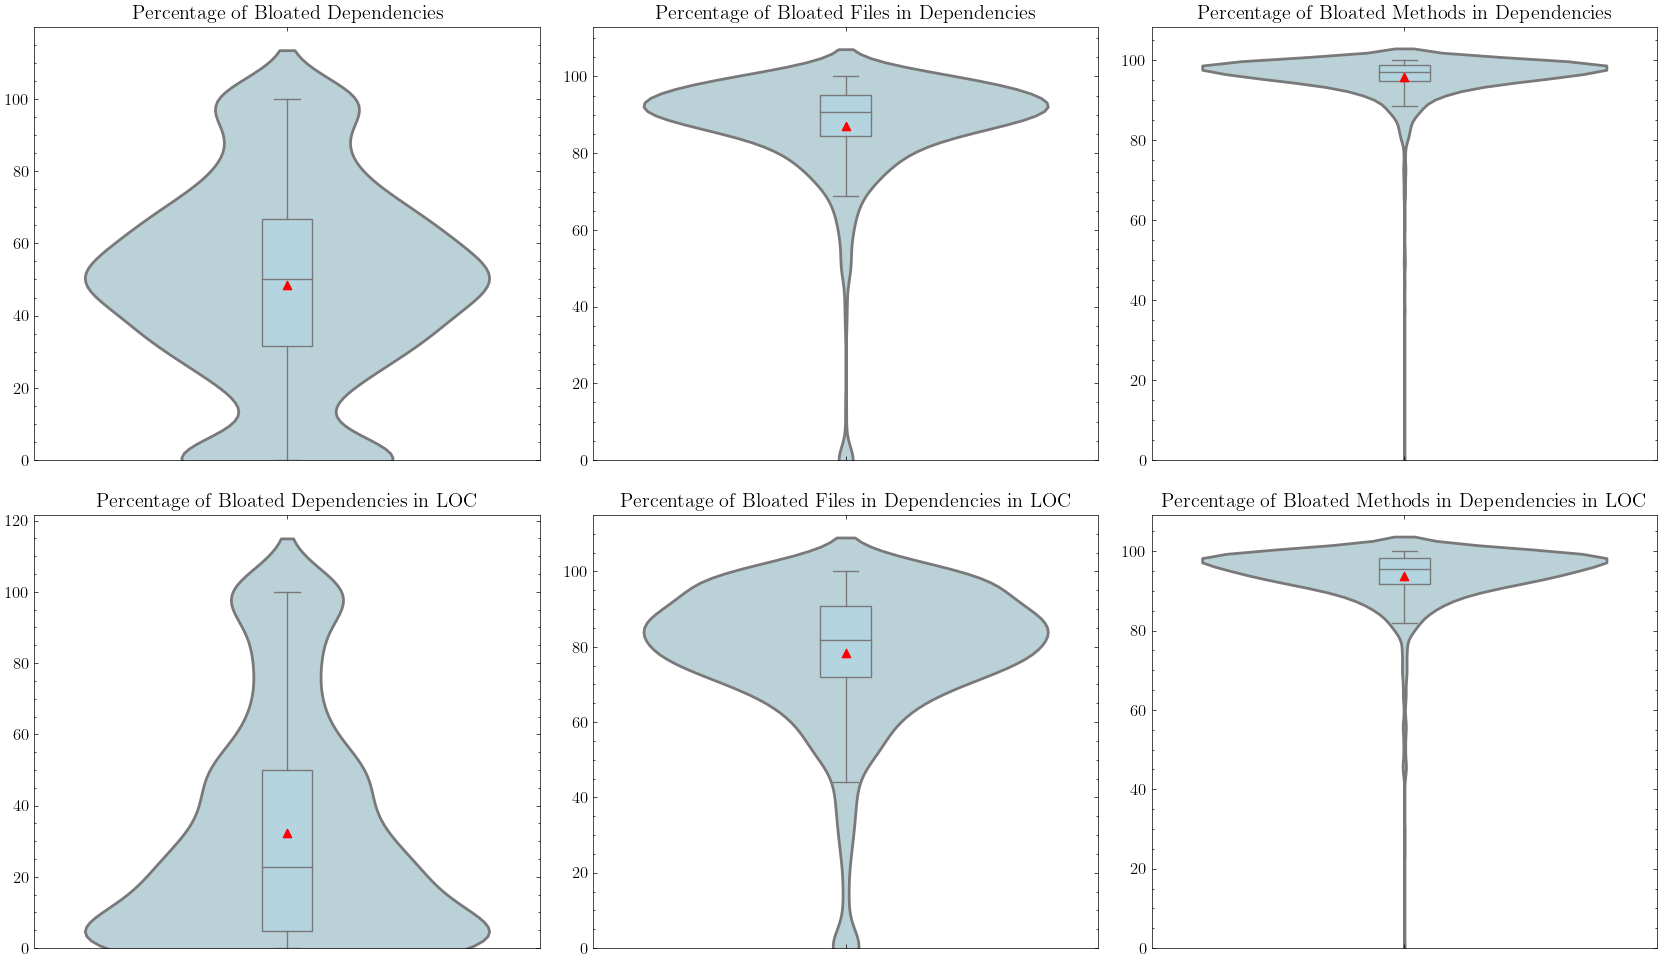

In [77]:
plt.figure(figsize=(17, 10))
for i, (metric, full_name) in enumerate(zip(metrics[6:], full_names[6:]), 1):
    plt.subplot(2, 3, i)
    
    # Draw violinplot with reduced saturation
    ax = sns.violinplot(y=df[metric], linewidth=2, color='lightblue', orient='h', inner=None, saturation=0.5)
    
    # Draw boxplot inside the violinplot with increased width and linewidth
    sns.boxplot(y=df[metric], color="lightblue", width=0.1, orient='h', showfliers=False, boxprops={'zorder': 2}, ax = ax)
    
    # Setting a y-limit
    ax.set_ylim(0)
    
    # Plot average value
    avg_val = df[metric].mean()
    marker = plt.matplotlib.markers.MarkerStyle(marker="^")
    plt.scatter(0, avg_val, color='red', marker=marker, s=35, zorder=5)
    
    plt.title(f'{full_name}', fontsize=14.5)
    
    if df[metric].max() >= 1e6:
        plt.yticks(ticks=plt.yticks()[0], labels=[f'{y/scale_factor:.1f}M' for y in plt.yticks()[0]])
    
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel("")
    plt.tight_layout()


In [78]:
zero_count = df[df['PBD'] == 0].shape[0]
hundred_count = df[df['PBD'] == 100].shape[0]
zero_count_loc = df[df['PBD-LOC'] == 0].shape[0]
hundred_count_loc = df[df['PBD-LOC'] == 100].shape[0]

In [79]:
zero_count, hundred_count, zero_count_loc,  hundred_count_loc

(177, 93, 177, 93)

In [80]:
hundred_count

93

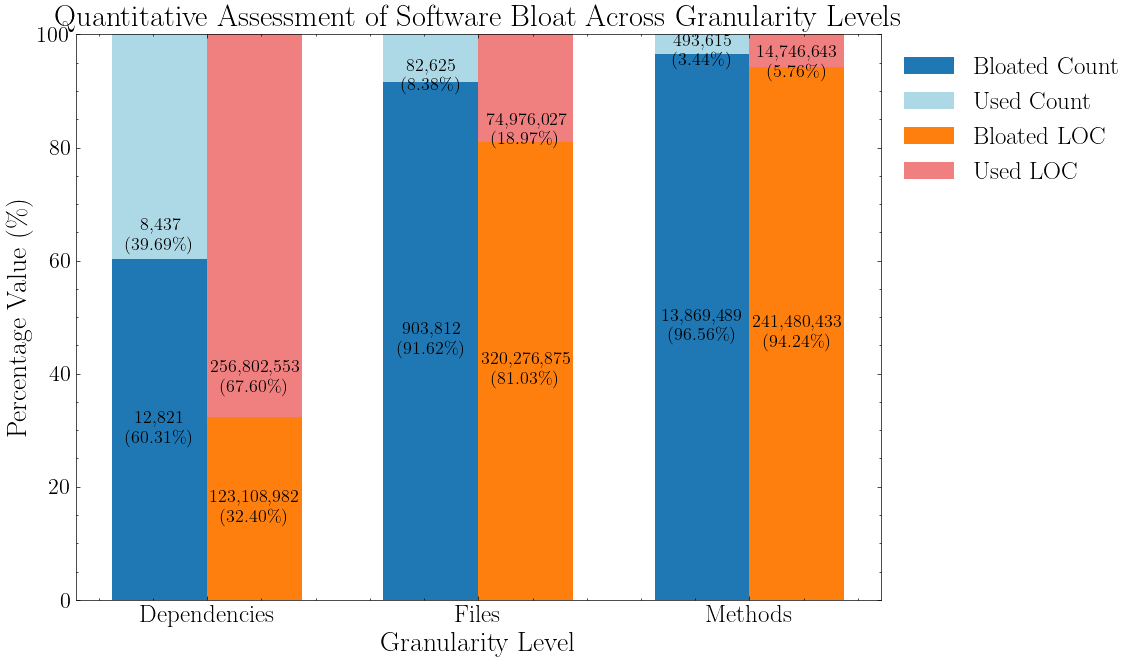

In [81]:
plt.style.use({
    'font.family': 'serif',          # Change font family to serif
    'font.serif': 'Times New Roman', # Choose a serif font
    'font.size': 16,                # Increase the font size
    'font.weight': 'normal',        # Set font weight to normal (options: 'normal', 'bold', 'heavy', 'light', 'ultrabold')
})
# Data calculations

# Calculate used counts for each row and then sum
df['Used_deps_cnt'] = df['NBD'] / (df["PBD"]/100) - df['NBD']
df['Used_files_cnt'] = df['NBFD'] / (df["PBFD"]/100) - df['NBFD']
df['Used_methods_cnt'] = df['NBMD'] / (df["PBMD"]/100) - df['NBMD']

df['Used_deps_loc'] = df['NBD-LOC'] / (df["PBD-LOC"]/100) - df['NBD-LOC']
df['Used_files_loc'] = df['NBFD-LOC'] / (df["PBFD-LOC"]/100) - df['NBFD-LOC']
df['Used_methods_loc'] = df['NBMD-LOC'] / (df["PBMD-LOC"]/100) - df['NBMD-LOC']

# Sum the counts for both metrics and LOCs
total_bloated_counts = [df["NBD"].sum(), df["NBFD"].sum(), df["NBMD"].sum()]
total_used_counts = [df['Used_deps_cnt'].sum(), df['Used_files_cnt'].sum(), df['Used_methods_cnt'].sum()]

total_bloated_locs = [df["NBD-LOC"].sum(), df["NBFD-LOC"].sum(), df["NBMD-LOC"].sum()]
total_used_locs = [df['Used_deps_loc'].sum(), df['Used_files_loc'].sum(), df['Used_methods_loc'].sum()]

# Convert to percentages
bloated_percentages = [(bloated / (bloated + used)) * 100 for bloated, used in zip(total_bloated_counts, total_used_counts)]
used_percentages = [100 - value for value in bloated_percentages]

bloated_LOC_percentages = [(bloated / (bloated + used)) * 100 for bloated, used in zip(total_bloated_locs, total_used_locs)]
used_LOC_percentages = [100 - value for value in bloated_LOC_percentages]

# Plotting
labels = ['Dependencies', 'Files', 'Methods']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width/2, bloated_percentages, width, color='tab:blue', label='Bloated Count')
bars2 = ax.bar(x - width/2, used_percentages, width, color='lightblue', bottom=bloated_percentages, label='Used Count')

bars3 = ax.bar(x + width/2, bloated_LOC_percentages, width, color='tab:orange', label='Bloated LOC')
bars4 = ax.bar(x + width/2, used_LOC_percentages, width, color='lightcoral', bottom=bloated_LOC_percentages, label='Used LOC')

def add_values_to_bars(bars, data_values, percentages, previous_bar_heights=None):
    for bar, val, pct in zip(bars, data_values, percentages):
        height = bar.get_height()
        
        # For values at the bottom part of the stacked bar (the bloated bars)
        if previous_bar_heights is None:
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                     f"{int(val):,}\n({pct:.2f}\%)", ha='center', va='center', color='black', fontsize=13)
        
        # For values at the top part of the stacked bar (the used bars)
        else:
            idx = bars.index(bar)
            bar_mid_position = previous_bar_heights[idx] + height/10
            ax.text(bar.get_x() + bar.get_width()/2., bar_mid_position, 
                   f"{int(val):,}\n({pct:.2f}\%)", ha='center', va='center', color='black', fontsize=13)

# Add values to the bars
add_values_to_bars(bars1, total_bloated_counts, bloated_percentages)
add_values_to_bars(bars2, total_used_counts, used_percentages, [bar.get_height() for bar in bars1])
add_values_to_bars(bars3, total_bloated_locs, bloated_LOC_percentages)
add_values_to_bars(bars4, total_used_locs, used_LOC_percentages, [bar.get_height() for bar in bars3])

ax.set_xlabel('Granularity Level', fontsize=20)
ax.set_ylabel('Percentage Value (\%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend(loc='upper left', fontsize=18, bbox_to_anchor=(1, 1))
ax.set_ylim(0, 100)

plt.title('Quantitative Assessment of Software Bloat Across Granularity Levels', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(right=0.75)
plt.savefig('figures/granularity_level_comparison_rq1.pdf', bbox_inches='tight', dpi=300)
plt.show()
